In [1]:
# Standard Library Modules
import string
import os
import re

#Related 3rd Party Modules
import pandas
import numpy
import nltk
import sklearn
import sklearn.decomposition
import scipy

In [22]:
with open('SWTFA_comments.txt', 'r',encoding='utf-8') as file:
    SWTFA_comments = [x.replace('\n', ' ') for x in file.readlines()]

SWTFA_comments[:10]
ids = list(range(len(SWTFA_comments)))
df = pandas.DataFrame(zip(ids,SWTFA_comments), columns= ["id", "text"])
df.head()

,id,text
0,0,"man i wish i could go back to mid 2015, when e..."
1,1,nostalgia and the old good times when nobody h...
2,2,I miss this old times
3,3,Finn at the beginning of the trilogy: I have a...
4,4,Finn at the end of the trilogy: REY!!!!


In [30]:
#tokens = nltk.word_tokenize(SWTFA_comments)
df['tokens'] = df.text.apply(nltk.word_tokenize)
#porter = nltk.PorterStemmer()

#Lemmatizer based on The Porter Stemming Algorithm
wordnet_lemmatizer = nltk.stem.WordNetLemmatizer()

stops = nltk.corpus.stopwords.words('english')
stops += [",", ":", ";", "!", "?"]
df['stemmed'] = df.tokens.apply(lambda tokens: \
                [wordnet_lemmatizer.lemmatize(t) for t in tokens])
df['nostop'] = df.stemmed.apply(lambda tokens: \
                [t for t in tokens if t not in stops])
df.head()

,id,text,tokens,stemmed,nostop
0,0,"man i wish i could go back to mid 2015, when e...","[man, i, wish, i, could, go, back, to, mid, 20...","[man, i, wish, i, could, go, back, to, mid, 20...","[man, wish, could, go, back, mid, 2015, everyo..."
1,1,nostalgia and the old good times when nobody h...,"[nostalgia, and, the, old, good, times, when, ...","[nostalgia, and, the, old, good, time, when, n...","[nostalgia, old, good, time, nobody, hated, st..."
2,2,I miss this old times,"[I, miss, this, old, times]","[I, miss, this, old, time]","[I, miss, old, time]"
3,3,Finn at the beginning of the trilogy: I have a...,"[Finn, at, the, beginning, of, the, trilogy, :...","[Finn, at, the, beginning, of, the, trilogy, :...","[Finn, beginning, trilogy, I, interesting, bac..."
4,4,Finn at the end of the trilogy: REY!!!!,"[Finn, at, the, end, of, the, trilogy, :, REY,...","[Finn, at, the, end, of, the, trilogy, :, REY,...","[Finn, end, trilogy, REY]"


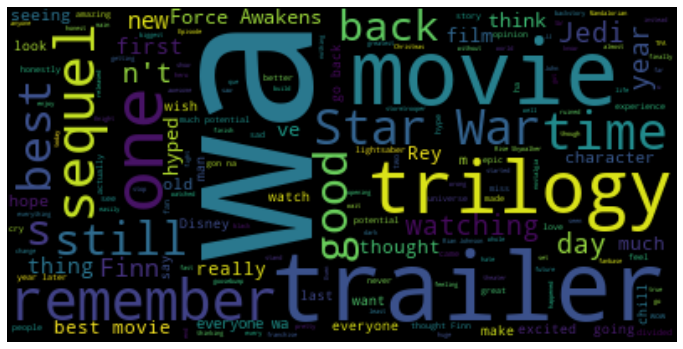

In [31]:
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt

slist =[]
for x in df.nostop:
    slist.extend(x)
stxt = ' '.join(slist)

# Display the generated image:
#wordcloud = WordCloud(min_font_size = 9).generate_from_frequencies(counts)
wordcloud = WordCloud().generate(stxt)

# Plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()